In [40]:
import cv2
from math import exp,sqrt
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.exposure import rescale_intensity

## cross bilateral filter

In [64]:
def CrossBilateralFilterMine(flash,noFlash,d,sigma_d,sigma_r):
    d2 = d//2
    rf = flash.shape[0]
    cf = flash.shape[1]
    chf = flash.shape[2]
    
    final = np.zeros((rf,cf,chf))
    rnf = noFlash.shape[0]
    cnf = noFlash.shape[1]
    chnf = noFlash.shape[2]
    print(flash.shape,noFlash.shape)
    
    new_flash = np.zeros((rf+d-1,cf+d-1,3))
    new_noflash = np.zeros((rnf+d-1,cnf+d-1,3))
    
    new_flash[d-1:rf+d-1,d-1:cf+d-1] = flash
    new_noflash[d-1:rnf+d-1,d-1:cnf+d-1] = noFlash
    
    
    new = np.ones((d,d,3))
    start = time.time()
    for i in range(rf):
        for j in range(cf):
            for m in range(d):
                for n in range(d):
                    flash_partr = new_flash[i:i+d,j:j+d,0]
                    flash_partg = new_flash[i:i+d,j:j+d,1]
                    flash_partb = new_flash[i:i+d,j:j+d,2]
                    
                    noFlash_partr = new_flash[i:i+d,j:j+d,0]
                    noFlash_partg = new_flash[i:i+d,j:j+d,1]                    
                    noFlash_partb = new_flash[i:i+d,j:j+d,2]
                    
                    k1 = exp((-1/(2*sigma_d*sigma_r))*((m-d2)**2+(n-d2)**2))
                    k2 = exp((-1/(2*sigma_r*sigma_r))*((flash_partr[m,n]-flash_partr[d2,d2])**2))
                    k3 = exp((-1/(2*sigma_r*sigma_r))*((flash_partg[m,n]-flash_partg[d2,d2])**2))
                    k4 = exp((-1/(2*sigma_r*sigma_r))*((flash_partb[m,n]-flash_partb[d2,d2])**2))
                    
                    new[m,n,0] = k1*k2
                    new[m,n,1] = k1*k3
                    new[m,n,2] = k1*k4
#             sumArr0 = np.sum(new[:,:,0])
#             sumArr1 = np.sum(new[:,:,1])
#             sumArr2 = np.sum(new[:,:,2])
#             new = new/sumArr
            
            
            final[i,j][0] = int(np.sum(np.multiply(noFlash_partr,new[:,:,0])))
            final[i,j][1] = int(np.sum(np.multiply(noFlash_partg,new[:,:,1])))
            final[i,j][2] = int(np.sum(np.multiply(noFlash_partb,new[:,:,2])))
            
    end = time.time()
    print(end-start)
    return final

In [65]:
potsFlash = cv2.imread("../input_data/pots_flash.jpg",1)
potsNoFlash = cv2.imread("../input_data/pots_no_flash.jpg",1)

new = CrossBilateralFilterMine(potsFlash,potsNoFlash,7,12,12)



(706, 774, 3) (706, 774, 3)


124
(706, 774, 3)
219


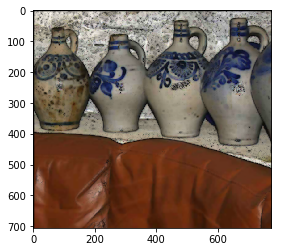

In [67]:
# new = int(new)
print(potsFlash[23,34,2])
# new = new//1
print(new.shape)
# new = rescale_intensity(new, in_range=(0, 255))
cv2.normalize(new,new,0,255,cv2.NORM_MINMAX,dtype=-1)
new = (new).astype("uint8")
# plt.imshow(new)
# print(new)
plt.imshow(cv2.cvtColor(new, cv2.COLOR_BGR2RGB))
print(new[23,34,2])

## inverse bilateral filter

In [67]:
def InverseBilateralFilter(im,d, sigma_d, sigma_r):
    im_r=im.shape[0]
    im_c=im.shape[1]
    d2 = d//2
    print(im.shape)
    new_im=np.zeros((im_r+d-1,im_c+d-1))
    new_im[d-1:im_r+d-1,d-1:im_c+d-1]=im
    final=np.zeros((im_r,im_c))
    new = np.ones((d,d))
    for i in range(im_r):
        for j in range(im_c):
            for m in range(d):
                for n in range(d):
                    im_part=new_im[i:i+d,j:j+d]
                    k1 = exp(((-1/(2*sigma_d*sigma_d))*(1-abs((m-d2)**2+(n-d2)**2))))
                    k2 = exp(((-1/(2*sigma_r*sigma_r))*(((im_part[m,n]-im_part[d2,d2])**2))))
                    new[m,n] = k1*k2
            sumArr = np.sum(new)
            new=new/sumArr
            final[i,j] = np.sum(np.multiply(im_part,new))
        
    return final

In [68]:
bell = cv2.imread("../input_data/giraffe.jpeg",0)

final = InverseBilateralFilter(bell,7,12,12)



(275, 183)


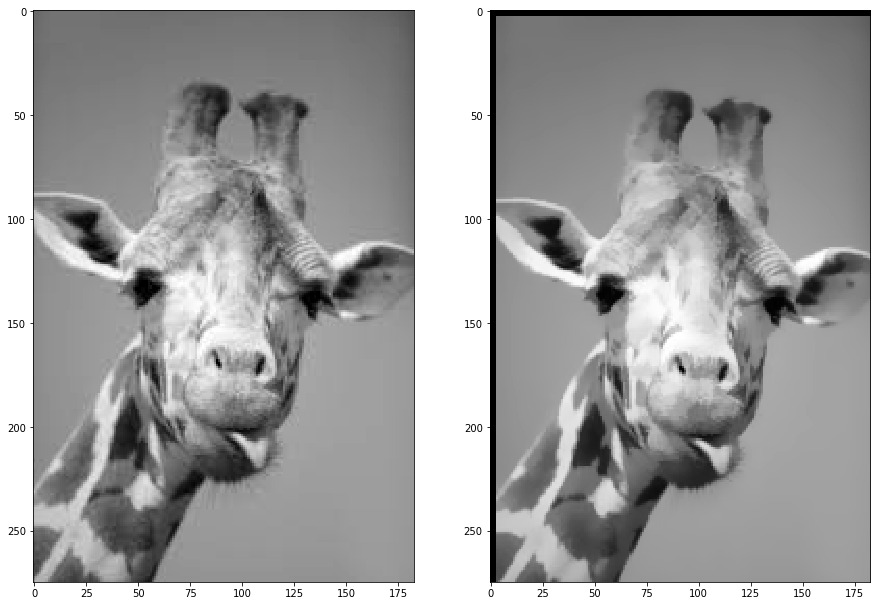

In [69]:
fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(bell,'gray')
plt.subplot(1,2,2)
plt.imshow(final,'gray')
plt.show()
# plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))